# Solution for delta source

A script that numerically evaluates the convolution with a delta source.

In [1]:
# include necessary libraries
import numpy as np
from soundpy import *
import sympy as sp
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import ipywidgets as widgets
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

%matplotlib notebook

In [2]:
F = None
if __name__ == '__main__':
    from soundpy import estimator
    
    F = estimator(max_order=2, multiprocess = True, n_cores = 16)

Generating Estimator for order 2
Assembling the estimator using multiprocessing on 16 cores
Permuations created successfully
	Send the slow data to the pool
	Send the fast data to the pool
	Slow: 0, 0, 0 Done!
	Fast: 0, 0, 0 Done!
	Slow: 1, 1, 1 Done!
	Slow: 1, 0, 0 Done!
	Fast: 1, 0, 0 Done!
	Fast: 1, 1, 1 Done!
	Slow: 2, 0, 0 Done!
	Slow: 2, 1, 1 Done!
	Fast: 2, 0, 0 Done!
	Slow: 2, 2, 2 Done!
	Fast: 2, 1, 1 Done!
	Fast: 2, 2, 2 Done!
	Slow: 1, 1, 0 Done!
	Fast: 1, 1, 0 Done!
	Slow: 2, 1, 0 Done!
	Slow: 2, 2, 1 Done!
	Fast: 2, 1, 0 Done!
	Fast: 2, 2, 1 Done!
	Slow: 2, 2, 0 Done!
	Fast: 2, 2, 0 Done!
Pool closed Successfully
recasting functions


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Estimator Generated Successfully


<IPython.core.display.Javascript object>


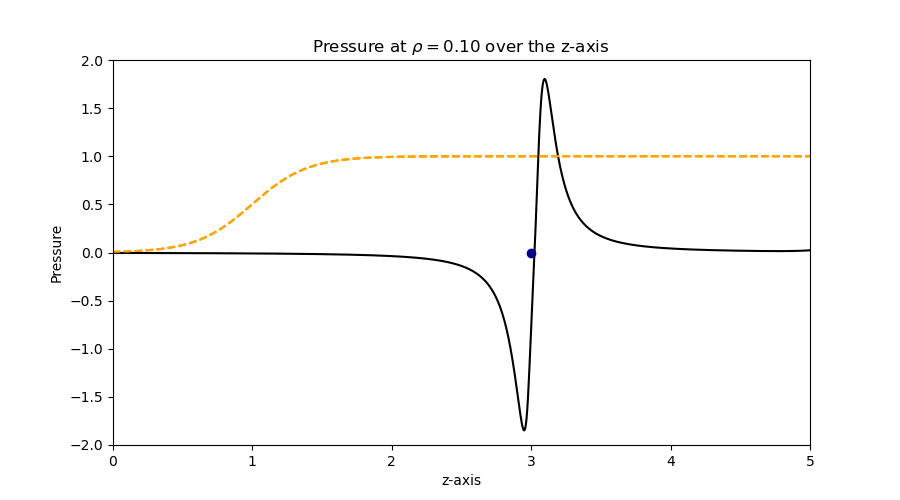

interactive(children=(FloatSlider(value=0.1, description='r', max=5.0, step=0.01), FloatSlider(value=1.0, desc…

In [3]:
# Set up a plot
fig = plt.figure(figsize=(9,5))
ax  = fig.add_subplot(111)

# Customization
z_lims  = (0,5)
y_lims  = (-2,2)
ax.set_xlim(*z_lims)
ax.set_ylim(*y_lims)
ax.set_xlabel('z-axis')
ax.set_ylabel('Pressure')
ax.set_title(r'Pressure at $\rho = 0.10$ over the z-axis')

# Data
N_pts   = 1000
z       = np.linspace(*z_lims,N_pts)

# Widgets and updating
@widgets.interact(r=(0,5,0.01),t=(0,10,0.1),v=(0,3,0.01),lamda=(0,1,0.001),a=(0,100,1),s=(-10,10,0.1))
def update(r=0.1,t=1,v=0.5,lamda=0.001,a=5,s=1):
    [l.remove() for l in ax.lines]
    
    ax.set_title(r'Pressure at $\rho = %4.2f$ over the z-axis'%r)
    ax.plot(z, F(r,z,t,v,lamda,a,s), color='k')
    ax.plot(z,1/(1+np.exp(-a*(z - s))), ls='--',c='orange')
    ax.plot([v*t],[0],marker='o',c='darkblue')

<IPython.core.display.Javascript object>


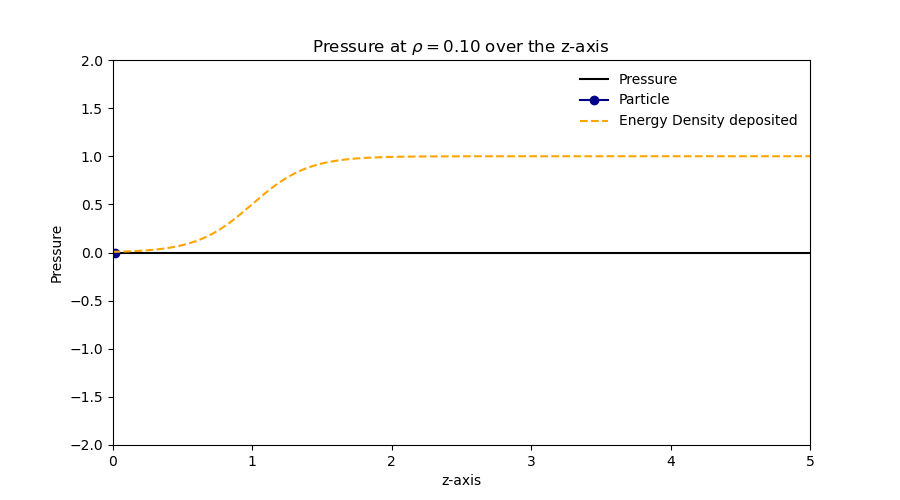

  0%|          | 0/1000 [00:00<?, ?it/s]

In [24]:
# Create an animation
# Animation parameters
N_pts   = 1000
t       = 5
r       = 0.15
v       = 1.5
lamda   = 0.1
a       = 5
s       = 1
z_lims  = (0,5)
y_lims  = (-2,2)
T_lims  = (z_lims[0]/v,z_lims[1]/v)
z       = np.linspace(*z_lims,N_pts)
T       = np.linspace(*T_lims,N_pts)

#Create the figure
fig = plt.figure(figsize=(9,5))
ax  = fig.add_subplot(111)

# Data
N_pts   = 1000
z       = np.linspace(*z_lims,N_pts)

# Plot the first frame
pressure, = ax.plot(z, F(r,z,T[0],v,lamda,a,s), color='k',label='Pressure')
particle, = ax.plot([v*T[0]],[0],marker='o',c='darkblue',label='Particle')

# Plot the energy background
ax.plot(z,1/(1+np.exp(-a*(z - s))), ls='--',c='orange',label='Energy Density deposited')

def init():
    # Customization
    z_lims  = (0,5)
    y_lims  = (-2,2)
    ax.set_xlim(*z_lims)
    ax.set_ylim(*y_lims)
    ax.set_xlabel('z-axis')
    ax.set_ylabel('Pressure')
    ax.set_title(r'Pressure at $\rho = 0.10$ over the z-axis')
    ax.legend(frameon=False)
    

def next_frame(i):
    pressure.set_data(z,F(r,z,T[i],v,lamda,a,s))
    particle.set_data([v*T[i]],[0])
    
    return pressure,particle


anim = FuncAnimation(fig, next_frame, frames=tqdm(range(len(T))),init_func=init, blit=True)

In [25]:
writer = animation.FFMpegWriter(fps=60,extra_args=['-threads', '50'])
anim.save('r0.1-v1.5-l0.1-a5-s1.mp4',writer=writer)

In [10]:
f = lambda i: tqdm(range(10))

In [11]:
f(1)

  0%|          | 0/10 [00:00<?, ?it/s]